In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import matplotlib as plt


## q1 ... finished

In [13]:

# check if you have not missing value
home_team = pd.read_csv("tennis_data/home_team.csv")
away_team = pd.read_csv("tennis_data/away_team.csv")
data = pd.concat([home_team , away_team] , join = "outer")
data = data[['player_id','full_name']]
data.drop_duplicates(subset=['player_id'] , inplace = True)
# print(data['player_id'].isnull().any())
data.isna().sum()

number_of_players = data['player_id'].nunique()
number_of_players
# need dataframe that has fullname and player_id


2644

## q3 ... finished 

In [15]:


home_team = pd.read_csv("tennis_data/home_team.csv")
away_team = pd.read_csv("tennis_data/away_team.csv")
home_team = home_team[['match_id','player_id' ,'full_name']]
away_team = away_team[['match_id','player_id' ,'full_name']]
players = pd.merge(home_team , away_team , how = "inner" , on = "match_id" , suffixes=["_home" , "_away"])
players.sort_values('match_id' , inplace=True)
players.drop_duplicates(subset = ['match_id'] , inplace = True)
players


event = pd.read_csv("tennis_data/event.csv")
event = event[event['winner_code'].notnull()].drop_duplicates(subset=['match_id']).sort_values('match_id')
event = event[['match_id' , 'winner_code']]
event = event.reset_index().drop('index' , axis = 'columns')

    
total = pd.merge(players , event , on = 'match_id' , how = 'inner')
total_home = total[total['winner_code'] == 1.0].copy()
total_away = total[total['winner_code'] == 2.0].copy()
total_home = total_home[['player_id_home' , 'full_name_home']].sort_values('full_name_home').rename(columns={'player_id_home':'playe_id' , 'full_name_home' :'full_name'})
total_away = total_away[['player_id_away' , 'full_name_away']].sort_values('full_name_away').rename(columns={'player_id_away':'playe_id' , 'full_name_away' :'full_name'})
# total_home
# total_away
total = pd.concat([total_home , total_away])
total.sort_values('full_name' , inplace = True)
num_win = pd.DataFrame(total['full_name'].value_counts())
num_win.reset_index(inplace=True)
num_win.head()
# ax = sns.barplot(num_win[:4], x="full_name", y="count")


full_name  count
0                      Popko, Dmitry     28
1                   Chidekh, Clement     23
2                       Faria, Jaime     20
3                      Gengel, Marek     19
4  Dellien Velasco, Murkel Alejandro     19

## q5 ... finished

In [16]:


# import data and clear
time = pd.read_csv("tennis_data/time.csv")
time.sort_values('match_id' , inplace = True)
time.drop_duplicates(subset = ['match_id'] , inplace=True)
time.dropna(subset = ['period_1'] , inplace = True)
time.dropna(subset = ['period_2'] , inplace = True)
# check if you have period_4 or period_5
print(time['period_4'].notnull().any())
print(time['period_5'].notnull().any())
# drop period_4 and period_5 and fill null with 0
time.drop(['period_4' , 'period_5' ,'current_period_start_timestamp']  , axis = 'columns', inplace = True )
values = {'period_3':0}
time.fillna(value = values , inplace = True)
time.loc[time['period_3'] == 0 , 'num_set'] = 2
time.loc[time['period_3'] != 0 , 'num_set'] = 3
time
time['num_set'].value_counts()


False
False


num_set
2.0    7430
3.0    3274
Name: count, dtype: int64

## q7 ... finished

In [17]:


aces = pd.read_csv("tennis_data/period.csv")
aces = aces[aces['period'] == 'ALL'][aces['statistic_name'] == 'aces'].drop(['period' , 'statistic_category_name' , 'compare_code' ,'statistic_type' , 'value_type' , 'home_value' , 'away_value' , 'home_total' , 'away_total'] , axis='columns')
aces = aces.drop_duplicates(subset=['match_id']).sort_values('match_id')
aces = aces.astype({'home_stat':'int32' , 'away_stat':'int32'})

# check home&away stat is not null
print(aces['home_stat'].isnull().any())
print(aces['away_stat'].isnull().any())
aces['number_of_aces'] = aces['home_stat'].add(aces['away_stat'])
aces = aces.drop(['statistic_name' , 'home_stat' ,  'away_stat'] , axis = 'columns')
mean = aces['number_of_aces'].describe()
mean
# aces


False
False


C:\Users\digi kala\AppData\Local\Temp\ipykernel_12380\3624118234.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  aces = aces[aces['period'] == 'ALL'][aces['statistic_name'] == 'aces'].drop(['period' , 'statistic_category_name' , 'compare_code' ,'statistic_type' , 'value_type' , 'home_value' , 'away_value' , 'home_total' , 'away_total'] , axis='columns')


count    11389.000000
mean         5.438318
std          5.275763
min          0.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         51.000000
Name: number_of_aces, dtype: float64

## q9 ... finished

In [18]:


from datetime import datetime
time = pd.read_csv("tennis_data/time.csv")
time.sort_values('match_id' , inplace = True)
date = time.drop_duplicates(subset = 'match_id').dropna(subset = 'current_period_start_timestamp').copy()
date = date[['match_id' , 'current_period_start_timestamp']]
date = date.astype({'current_period_start_timestamp':'int32'})
date['play_in_month'] = 0
for dt in date['match_id']:
    date.loc[date['match_id'] == dt , 'play_in_month']  = datetime.fromtimestamp(int(date[date['match_id'] == dt]['current_period_start_timestamp'])).month

month_1 = date[date['play_in_month'] == 1]
month_2 = date[date['play_in_month'] == 2]
month_3 = date[date['play_in_month'] == 3]
month_4 = date[date['play_in_month'] == 4]
month_1
home_team = pd.read_csv("tennis_data/home_team.csv")
away_team = pd.read_csv("tennis_data/away_team.csv")
home_team = home_team[['match_id','player_id' ,'full_name']]
away_team = away_team[['match_id','player_id' ,'full_name']]
players = pd.merge(home_team , away_team , how = "inner" , on = "match_id" , suffixes=["_home" , "_away"])
players.sort_values('match_id' , inplace=True)
players.drop_duplicates(subset = ['match_id'] , inplace = True)
event = pd.read_csv("tennis_data/event.csv")
event = event[event['winner_code'].notnull()].drop_duplicates(subset=['match_id']).sort_values('match_id')
event = event[['match_id' , 'winner_code']]
event = event.reset_index().drop('index' , axis = 'columns')
winner = pd.merge(players , event , on = 'match_id' , how = 'inner')
winner['winner_name'] = 'all'
winner['winner_id'] = 0
winner.loc[winner['winner_code'] == 1 , 'winner_name'] = winner['full_name_home']
winner.loc[winner['winner_code'] == 1 , 'winner_id'] = winner['player_id_home']
winner.loc[winner['winner_code'] == 2 , 'winner_name'] = winner['full_name_away']
winner.loc[winner['winner_code'] == 2 , 'winner_id'] = winner['player_id_away']
winner = winner[['match_id' , 'winner_name' , 'winner_id']]
winner
tournament = pd.read_csv("tennis_data/tournament.csv")
tournament = tournament[['match_id' , 'tournament_id']]
tournament.drop_duplicates(subset = 'match_id' , inplace = True)
tournament
play_tour = pd.merge(winner , tournament , on = 'match_id' , how = 'inner')
month_1 = pd.merge(month_1 , play_tour , on = 'match_id' , how = 'inner')
month_2 = pd.merge(month_2 , play_tour , on = 'match_id' , how = 'inner')
month_3 = pd.merge(month_3 , play_tour , on = 'match_id' , how = 'inner')
month_4 = pd.merge(month_4 , play_tour , on = 'match_id' , how = 'inner')
month_1 = month_1[['winner_name' , 'winner_id' , 'tournament_id']]
month_2 = month_2[['winner_name' , 'winner_id' , 'tournament_id']]
month_3 = month_3[['winner_name' , 'winner_id' , 'tournament_id']]
month_4 = month_4[['winner_name' , 'winner_id' , 'tournament_id']]

month_2.groupby('tournament_id')['winner_name'].value_counts().groupby(level = 0).head(1).reset_index(name = 'win_count')

monthes = [month_1 , month_2 , month_3 , month_4]
finall = pd.DataFrame({'tournament_id':1234 , 'month':[1,2,3,4] , 'winner_name':'A' , 'number_of_win':0}) # generate finall dataframe with default values
for indx , mnth in enumerate(monthes):
    counts = mnth.groupby(['tournament_id' , 'winner_name']).size().reset_index(name = 'count')
    max_counts = counts.groupby('tournament_id')['count'].transform('max')
    result = counts[counts['count'] == max_counts].sort_values(['count' , 'tournament_id'] , ascending=False)
    result = result.astype({'winner_name':'str'})
    finall.loc[finall['month'] == indx + 1 , 'winner_name'] = result.iloc[0]['winner_name']
    finall.loc[finall['month'] == indx + 1 , 'number_of_win'] = result.iloc[0]['count']
    finall.loc[finall['month'] == indx + 1 , 'tournament_id'] = result.iloc[0]['tournament_id']

finall



C:\Users\digi kala\AppData\Local\Temp\ipykernel_12380\1228553490.py:9: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  date.loc[date['match_id'] == dt , 'play_in_month']  = datetime.fromtimestamp(int(date[date['match_id'] == dt]['current_period_start_timestamp'])).month
C:\Users\digi kala\AppData\Local\Temp\ipykernel_12380\1228553490.py:9: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  date.loc[date['match_id'] == dt , 'play_in_month']  = datetime.fromtimestamp(int(date[date['match_id'] == dt]['current_period_start_timestamp'])).month
C:\Users\digi kala\AppData\Local\Temp\ipykernel_12380\1228553490.py:9: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  date.loc[date['match_id'] == dt , 'play_in_month']  = dateti

tournament_id  month        winner_name  number_of_win
0         126375      1      Kan, Victoria              1
1         126789      2   Paolini, Jasmine              6
2         127762      3  Collins, Danielle              7
3         128448      4       Gola, Andrea              1

## q11 ... finished 

In [19]:



# import data and clear
time = pd.read_csv("tennis_data/time.csv")
time.sort_values('match_id' , inplace = True)
time.drop_duplicates(subset = ['match_id'] , inplace=True)
time.dropna(subset = ['period_1'] , inplace = True)
time.dropna(subset = ['period_2'] , inplace = True)
# check if you have period_4 or period_5
print(time['period_4'].notnull().any())
print(time['period_5'].notnull().any())
# drop period_4 and period_5 and fill null with 0
time.drop(['period_4' , 'period_5' ,'current_period_start_timestamp']  , axis = 'columns', inplace = True )
values = {'period_3':'0'}
time.fillna(value = values , inplace = True)
# casting type to int32
time = time.astype({'period_1':'int32' , 'period_2':'int32' , 'period_3':'int32'})

# calculate match_time
time['period1 + period2'] = time['period_1'].add(time['period_2'])
time['total_period'] = time['period1 + period2'].add(time['period_3'])
mean_duration = time['total_period'].mean()
mean_duration
# calculate time
def convert(x):
    hour = x // 3600
    minute = (x - (3600*hour)) // 60
    seconds = x - ((3600*hour) + (minute*60))
   
    return "%d:%02d:%02d" % (hour, minute, seconds)

print(convert(mean_duration))


False
False
1:55:11


## q13 ... finished 

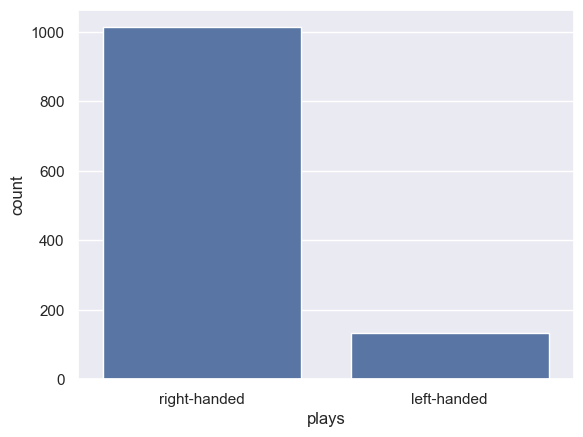

In [20]:


home_team = pd.read_csv("tennis_data/home_team.csv")
away_team = pd.read_csv("tennis_data/away_team.csv")
home_team = home_team[['player_id' , 'plays']]
away_team = away_team[['player_id' , 'plays']]
home_team.dropna(subset=['plays'] , inplace = True)
away_team.dropna(subset= ['plays'] , inplace = True)
total = pd.concat([home_team , away_team])
total.drop_duplicates(subset = ['player_id'] , inplace = True)
rl = pd.DataFrame(total['plays'].value_counts())
rl.reset_index(inplace=True)
rl

# home_team.drop_duplicates(subset = ['match_id'] , inplace=True)
# away_team.drop_duplicates(subset = ['match_id'] , inplace=True)
# home_team = home_team.sort_values('match_id')
# away_team = away_team.sort_values('match_id')
# home_team.dropna(subset=['plays'] , inplace = True)
# away_team.dropna(subset= ['plays'] , inplace = True)

# left = (home_team[home_team['plays'] == 'left-handed' ]['plays'].count()) + (away_team[away_team['plays'] == 'left-handed']['plays'].count())
# right = (home_team[home_team['plays'] == 'right-handed']['plays'].count()) + (away_team[away_team['plays'] == 'right-handed']['plays'].count())
# left
# right_left = pd.Series(home_team['plays'])
# right_left = pd.concat([right_left , away_team['plays']] , axis= 'index')
# left = right_left[right_left == 'left-handed'].count()
# right = right_left[right_left == 'right-handed'].count()
ax = sns.barplot(rl, x="plays", y="count", errorbar=None)


## q15 ... finished 

<Axes: xlabel='country', ylabel='count'>

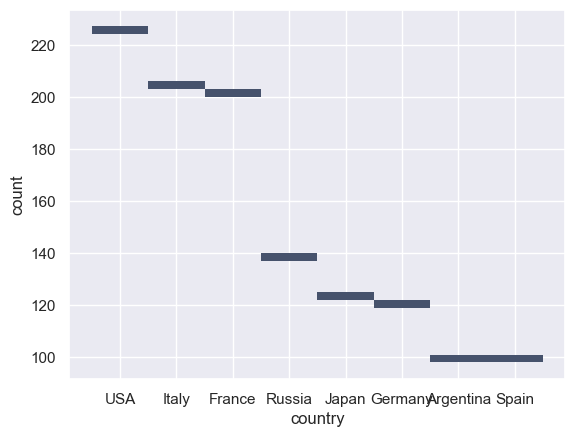

In [21]:


home_team = pd.read_csv("tennis_data/home_team.csv")
away_team = pd.read_csv("tennis_data/away_team.csv")
home_team = home_team[['player_id' , 'country']]
away_team = away_team[['player_id' , 'country']]
home_team.dropna(subset=['country'] , inplace = True)
away_team.dropna(subset= ['country'] , inplace = True)
total = pd.concat([home_team , away_team])
total.drop_duplicates(subset = ['player_id'] , inplace = True)
country = pd.DataFrame(total['country'].value_counts())
country.reset_index(inplace=True)
country.sort_values('count' , ascending=False)

# home_team.drop_duplicates(subset = ['match_id'] , inplace=True)
# away_team.drop_duplicates(subset = ['match_id'] , inplace=True)
# home_team = home_team.sort_values('match_id')
# away_team = away_team.sort_values('match_id')
# home_team.dropna(subset=['country'] , inplace = True)
# away_team.dropna(subset= ['country'] , inplace = True)
# countries =  pd.Series(home_team['country'])
# countries = pd.concat([countries , away_team['country']] , axis= 'index')
# countries = pd.DataFrame(countries.value_counts())




sns.histplot(data=country.iloc[0:8] , x = 'country' , y = 'count' , bins = 100 , binwidth=3)


## q17 ... finished

C:\Users\digi kala\AppData\Local\Temp\ipykernel_12380\2540454824.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  service = data[data['period'] == 'ALL'][data['statistic_name'].isin(['service_games_played','service_games_won']) ].sort_values('match_id').drop_duplicates(subset = ['match_id', 'statistic_name'])


<Axes: xlabel='match_id', ylabel='break_serve'>

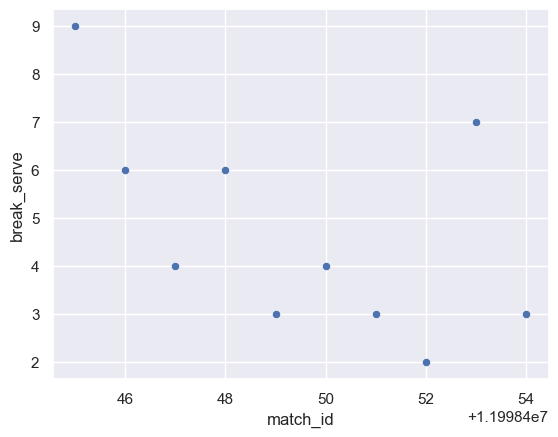

In [23]:

data = pd.read_csv("tennis_data/period.csv")
# aces = aces[aces['period'] == 'ALL'].drop(['period' , 'compare_code' ,'statistic_type' , 'value_type' , 'home_value' , 'away_value' , 'home_total' , 'away_total'] , axis='columns')
service = data[data['period'] == 'ALL'][data['statistic_name'].isin(['service_games_played','service_games_won']) ].sort_values('match_id').drop_duplicates(subset = ['match_id', 'statistic_name'])
service = service[['match_id' , 'statistic_name' , 'home_stat' , 'away_stat']]
service = service.astype({'home_stat':'int32' , 'away_stat':'int32'})
service['total'] = service['home_stat'].add(service['away_stat'])
service = service.pivot_table(values = 'total' , index = 'match_id' , columns = 'statistic_name')
service['break_serve'] = service['service_games_played'].sub(service['service_games_won'])
# # service['break_serve'].mean()
service[service['break_serve']<0] = np.nan
service.dropna(subset = ['break_serve'] , inplace=True)
service[service['break_serve']<0]
sns.scatterplot(data=service[0:10] , x = 'match_id' , y = 'break_serve')
